In [2]:
 # warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# HDDM
import hddm




df_orig = pd.read_csv('/data/victoria/HDDM_code/full_brain_behav.csv')
df = df_orig
df.rt = df.rt/1000
df = hddm.utils.flip_errors(df)
df = df.dropna()

In [3]:
early_learn = df[df['run'].isin([1, 2])].copy()

No model attribute --> setting up standard HDDM
Set model to ddm
-2415.568592825758
-2415.3753085781027
 [-----------------100%-----------------] 200 of 200 complete in 39.3 secNo model attribute --> setting up standard HDDM
Set model to ddm
-2417.0062213653414
-2416.7839483708594
 [-----------------100%-----------------] 200 of 200 complete in 35.6 secNo model attribute --> setting up standard HDDM
Set model to ddm
-2418.0643433914474
-2415.600099190379
 [-----------------100%-----------------] 200 of 200 complete in 38.3 sec

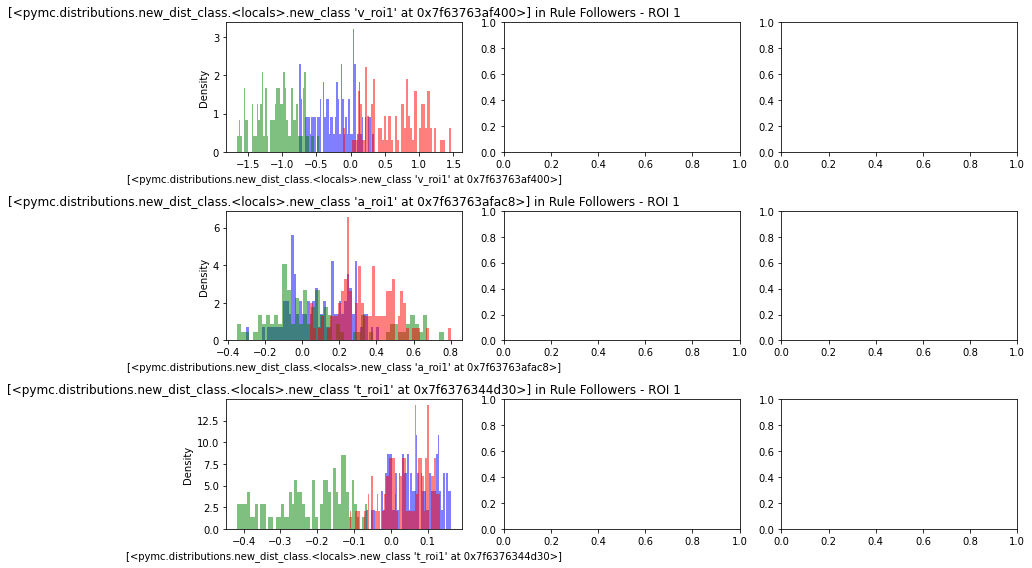

In [7]:
# Create empty lists to store posterior traces for each stimulus type
v_prototype_traces = []
a_prototype_traces = []
t_prototype_traces = []

v_exception_traces = []
a_exception_traces = []
t_exception_traces = []

v_rule_followers_traces = []
a_rule_followers_traces = []
t_rule_followers_traces = []

for i in range(1, 2):
    # Define the HDDMRegressor model for prototype
    m_prototype = hddm.HDDMRegressor(
        early_learn, 
        [
            f"v ~ roi{i} * C(type, Treatment('prototype'))",
            f"a ~ roi{i} * C(type, Treatment('prototype'))",
            f"t ~ roi{i} * C(type, Treatment('prototype'))"
        ],
        p_outlier=0.05
    )
    
    m_prototype.find_starting_values()
    m_prototype.sample(200, burn=100)
    
    # Append the posterior traces for prototype
    v_prototype_traces.append(m_prototype.nodes_db.node[f'v_roi{i}'])
    a_prototype_traces.append(m_prototype.nodes_db.node[f'a_roi{i}'])
    t_prototype_traces.append(m_prototype.nodes_db.node[f't_roi{i}'])
    
    # Define the HDDMRegressor model for exception
    m_exception = hddm.HDDMRegressor(
        early_learn, 
        [
            f"v ~ roi{i} * C(type, Treatment('exception'))",
            f"a ~ roi{i} * C(type, Treatment('exception'))",
            f"t ~ roi{i} * C(type, Treatment('exception'))"
        ],
        p_outlier=0.05
    )
    
    m_exception.find_starting_values()
    m_exception.sample(200, burn=100)
    
    # Append the posterior traces for exception
    v_exception_traces.append(m_exception.nodes_db.node[f'v_roi{i}'])
    a_exception_traces.append(m_exception.nodes_db.node[f'a_roi{i}'])
    t_exception_traces.append(m_exception.nodes_db.node[f't_roi{i}'])
    
    # Define the HDDMRegressor model for rule followers
    m_rule_followers = hddm.HDDMRegressor(
        early_learn, 
        [
            f"v ~ roi{i} * C(type, Treatment('rule follower'))",
            f"a ~ roi{i} * C(type, Treatment('rule follower'))",
            f"t ~ roi{i} * C(type, Treatment('rule follower'))"
        ],
        p_outlier=0.05
    )
    
    m_rule_followers.find_starting_values()
    m_rule_followers.sample(200, burn=100)
    
    # Append the posterior traces for rule followers
    v_rule_followers_traces.append(m_rule_followers.nodes_db.node[f'v_roi{i}'])
    a_rule_followers_traces.append(m_rule_followers.nodes_db.node[f'a_roi{i}'])
    t_rule_followers_traces.append(m_rule_followers.nodes_db.node[f't_roi{i}'])

# Plot posterior distributions for each parameter and stimulus type
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

for i, parameter_traces in enumerate([v_prototype_traces, a_prototype_traces, t_prototype_traces]):
    for j, trace in enumerate(parameter_traces):
        ax = axes[i][j]
        ax.hist(trace.trace(), bins=50, density=True, alpha=0.5, color='b')
        ax.set_title(f'{parameter_traces} in Prototype - ROI {j + 1}')
        ax.set_xlabel(f'{parameter_traces}')
        ax.set_ylabel('Density')

for i, parameter_traces in enumerate([v_exception_traces, a_exception_traces, t_exception_traces]):
    for j, trace in enumerate(parameter_traces):
        ax = axes[i][j]
        ax.hist(trace.trace(), bins=50, density=True, alpha=0.5, color='g')
        ax.set_title(f'{parameter_traces} in Exception - ROI {j + 1}')
        ax.set_xlabel(f'{parameter_traces}')
        ax.set_ylabel('Density')

for i, parameter_traces in enumerate([v_rule_followers_traces, a_rule_followers_traces, t_rule_followers_traces]):
    for j, trace in enumerate(parameter_traces):
        ax = axes[i][j]
        ax.hist(trace.trace(), bins=50, density=True, alpha=0.5, color='r')
        ax.set_title(f'{parameter_traces} in Rule Followers - ROI {j + 1}')
        ax.set_xlabel(f'{parameter_traces}')
        ax.set_ylabel('Density')

plt.tight_layout()
plt.show()


In [5]:
m_prototype.print_stats()

                                                               mean        std       2.5q         25q         50q         75q      97.5q      mc err
v_Intercept                                               0.0514743  0.0675676 -0.0879006  0.00544983   0.0530082   0.0950658   0.192118  0.00551517
v_C(type, Treatment('prototype'))[T.exception]             0.333148    0.14383  0.0730467    0.232453    0.327843    0.426076    0.63473   0.0106197
v_C(type, Treatment('prototype'))[T.rule follower]        -0.172984   0.121207   -0.41682   -0.254753   -0.176191  -0.0843679  0.0504022  0.00959055
v_roi1                                                    -0.158262   0.248972  -0.656583   -0.320969    -0.16334  0.00632411   0.357911   0.0197066
v_roi1:C(type, Treatment('prototype'))[T.exception]        -1.02722   0.514539   -2.11078    -1.35344   -0.997899   -0.680269 -0.0253559   0.0377882
v_roi1:C(type, Treatment('prototype'))[T.rule follower]    0.740873   0.425025  -0.105885    0.420652    0